In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Documentação da Tabela de Séries

## Descrição das Colunas

| Coluna               | Tipo de Dados | Descrição                                                                                                                                 |
|----------------------|---------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| `series_animedb_id`  | Inteiro       | Identificação única da série no banco de dados.                                                                                           |
| `series_title`       | Texto         | Título da série.                                                                                                                          |
| `series_type`        | Texto         | Tipo da série (TV, OVA, Filme, etc.).                                                                                                     |
| `series_episodes`    | Inteiro       | Número total de episódios da série.                                                                                                       |
| `my_id`              | Inteiro       | Identificação única da série.                                                                                                           |
| `my_watched_episodes`| Inteiro       | Número de episódios assistidos pelo usuário.                                                                                              |
| `my_start_date`      | Data          | Data em que o usuário começou a assistir a série.                                                                                         |
| `my_finish_date`     | Data          | Data em que o usuário terminou de assistir a série (se aplicável).                                                                        |
| `my_rated`           | Inteiro       | Indicador de avaliação pelo usuário (0 para não avaliado, 1 para avaliado).                                                               |
| `my_score`           | Inteiro       | Nota atribuída pelo usuário à série (0-10).                                                                                               |
| `my_storage`         | Texto         | Tipo de armazenamento da série (se está salvo localmente ou em outro tipo de mídia).                                                      |
| `my_storage_value`   | Inteiro       | Valor associado ao armazenamento (0 para inexistente, 1 para presente).                                                                   |
| `my_status`          | Texto         | Status atual da série para o usuário (Ex: "Completed", "Watching").                                                                       |
| `my_comments`        | Texto         | Comentários pessoais do usuário sobre a série.                                                                                            |
| `my_times_watched`   | Inteiro       | Número de vezes que o usuário assistiu a série novamente.                                                                                 |
| `my_rewatch_value`   | Inteiro       | Valor de rewatch atribuído pelo usuário (1 para sim, 0 para não).                                                                         |
| `my_priority`        | Texto         | Prioridade atribuída à série (LOW, MEDIUM, HIGH).                                                                                         |
| `my_tags`            | Texto         | Tags associadas à série pelo usuário.                                                                                                     |
| `my_rewatching`      | Inteiro       | Indicador se o usuário está reassistindo a série (1 para sim, 0 para não).                                                                |
| `my_rewatching_ep`   | Inteiro       | Número de episódios assistidos durante o rewatch.                                                                                         |
| `my_discuss`         | Texto         | Discussão ou tópicos relacionados à série.                                                                                                |
| `my_sns`             | Texto         | SNS ou rede social associada à série (por exemplo, plataforma de discussão).                                                              |
| `update_on_import`   | Inteiro       | Indicador se os dados devem ser atualizados na importação (1 para sim, 0 para não).                                                       |

### Exemplo de Entrada:

| series_animedb_id | series_title                          | series_type | series_episodes | my_id | my_watched_episodes | my_start_date | my_finish_date | my_rated | my_score | my_storage | my_storage_value | my_status  | my_comments                                                                                           | my_times_watched | my_rewatch_value | my_priority | my_tags   | my_rewatching | my_rewatching_ep | my_discuss | my_sns   | update_on_import |
|-------------------|---------------------------------------|-------------|-----------------|-------|---------------------|---------------|----------------|----------|----------|------------|------------------|------------|--------------------------------------------------------------------------------------------------------|------------------|------------------|-------------|-----------|---------------|------------------|------------|----------|------------------|
| 52034             | "Oshi no Ko"                          | TV          | 11              | 0     | 11                  | 2023-04-12    | 2023-06-28     |          | 1        |            | 0                | Completed  | 🥈: Indiscutivelmente bem produzido, porém raso em conteúdo.                                           | 0                | 0                | LOW         | 🥈        | 0             | 1                | default    | 0        |                  |
| 55791             | "Oshi no Ko" 2nd Season               | TV          | 13              | 0     | 9                   | 2024-07-03    | 0000-00-00     |          | 6        |            | 0                | Watching   |                                                                                                | 0                | 0                | LOW         |           | 0             | 1                | default    | 0        |                  |
| 1583              | 009-1                                 | TV          | 12              | 0     | 12                  | 2024-01-23    | 2024-01-26     |          | 4        |            | 0                | Completed  | Poderia resumir bastante e dizer que ele é simplesmente desinteressante.                                | 0                | 0                | LOW         |           | 0             | 1                | default    | 0        |                  |




In [ ]:
animelist = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/animelist.csv')
animelist.head(3)

,series_animedb_id,series_title,series_type,series_episodes,my_id,my_watched_episodes,my_start_date,my_finish_date,my_rated,my_score,...,my_comments,my_times_watched,my_rewatch_value,my_priority,my_tags,my_rewatching,my_rewatching_ep,my_discuss,my_sns,update_on_import
0,52034,"""Oshi no Ko""",TV,11,0,11,2023-04-12,2023-06-28,NaN,1,...,NaN,0,NaN,LOW,"🥈: Indiscutivelmente bem produzido, porém raso...",0,0,1,default,0
1,55791,"""Oshi no Ko"" 2nd Season",TV,13,0,9,2024-07-03,0000-00-00,NaN,6,...,NaN,0,NaN,LOW,NaN,0,0,1,default,0
2,1583,009-1,TV,12,0,12,2024-01-23,2024-01-26,NaN,4,...,NaN,0,NaN,LOW,Poderia resumir bastante e dizer que ele é sim...,0,0,1,default,0


In [ ]:
probcomplete = len(animelist[animelist['my_status']== 'Completed']) / len(animelist)

In [ ]:
print('A probabilidade do anime estar completo é igual a: '+ str(round(probcomplete*100,2)) + '%')

A probabilidade do anime estar completo é igual a: 94.03%


In [ ]:
probwatching = len(animelist[animelist['my_status']== 'Watching']) / len(animelist)

In [ ]:
print('A probabilidade do anime estar completo é igual a: '+ str(round(probwatching*100,2)) + '%')

A probabilidade do anime estar completo é igual a: 1.99%


In [ ]:
probdropped = len(animelist[animelist['my_status']== 'Dropped']) / len(animelist)

In [ ]:
print('A probabilidade do anime estar completo é igual a: '+ str(round(probdropped*100,2)) + '%')

A probabilidade do anime estar completo é igual a: 0.84%


In [ ]:
agrupamento = animelist['my_status'].value_counts()
agrupamento

,count
my_status,
Completed,897
Watching,19
Plan to Watch,16
On-Hold,14
Dropped,8


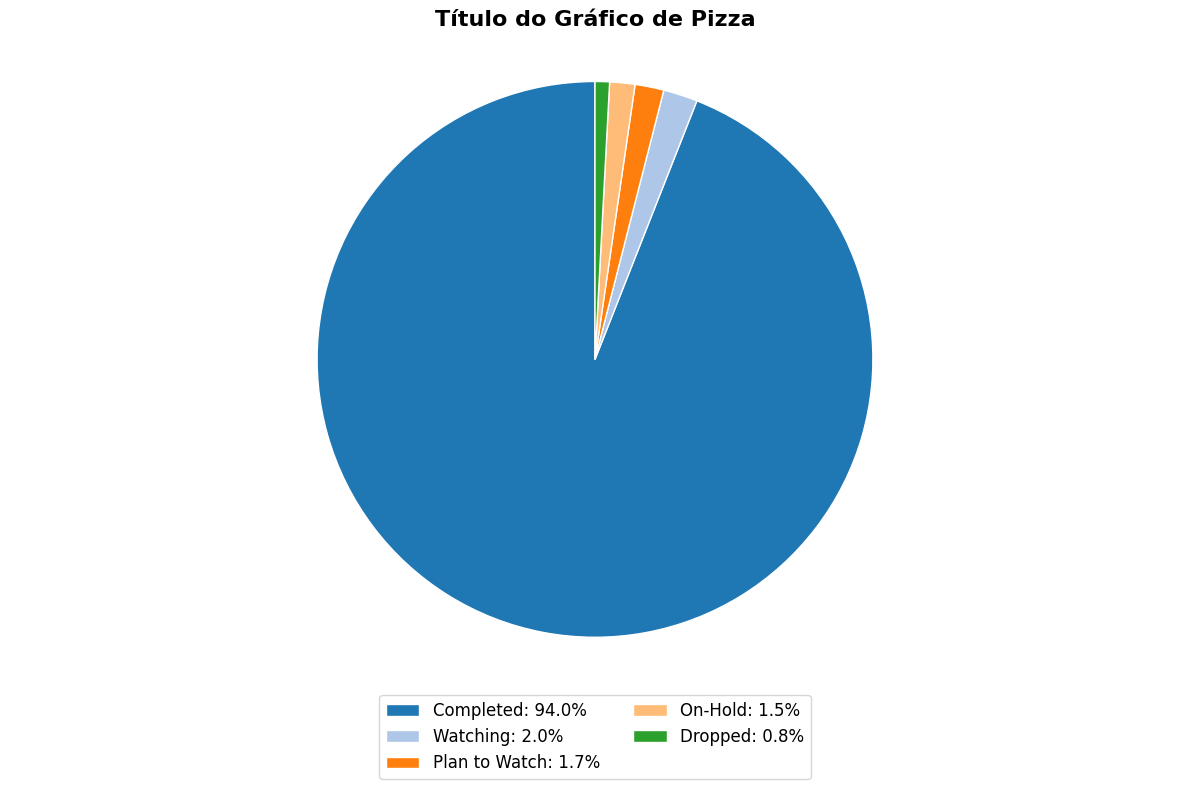

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

cores = plt.cm.tab20.colors

wedges, texts = ax.pie(agrupamento, colors=cores[:len(agrupamento)],
                       wedgeprops={'edgecolor': 'white'}, startangle=90)

labels = [f'{label}: {pct:.1f}%' for label, pct in zip(agrupamento.index, 100 * agrupamento / agrupamento.sum())]
ax.legend(wedges, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=12)

ax.set_title('Título do Gráfico de Pizza', fontsize=16, fontweight='bold', pad=20)
ax.axis('equal')

plt.tight_layout()
plt.show()


In [ ]:
notas = animelist['my_score'].value_counts().sort_index()
notas.columns = ['Nota', 'Quantidade']
notas

,count
my_score,
0,38
1,39
2,113
3,135
4,112
5,113
6,115
7,103
8,88


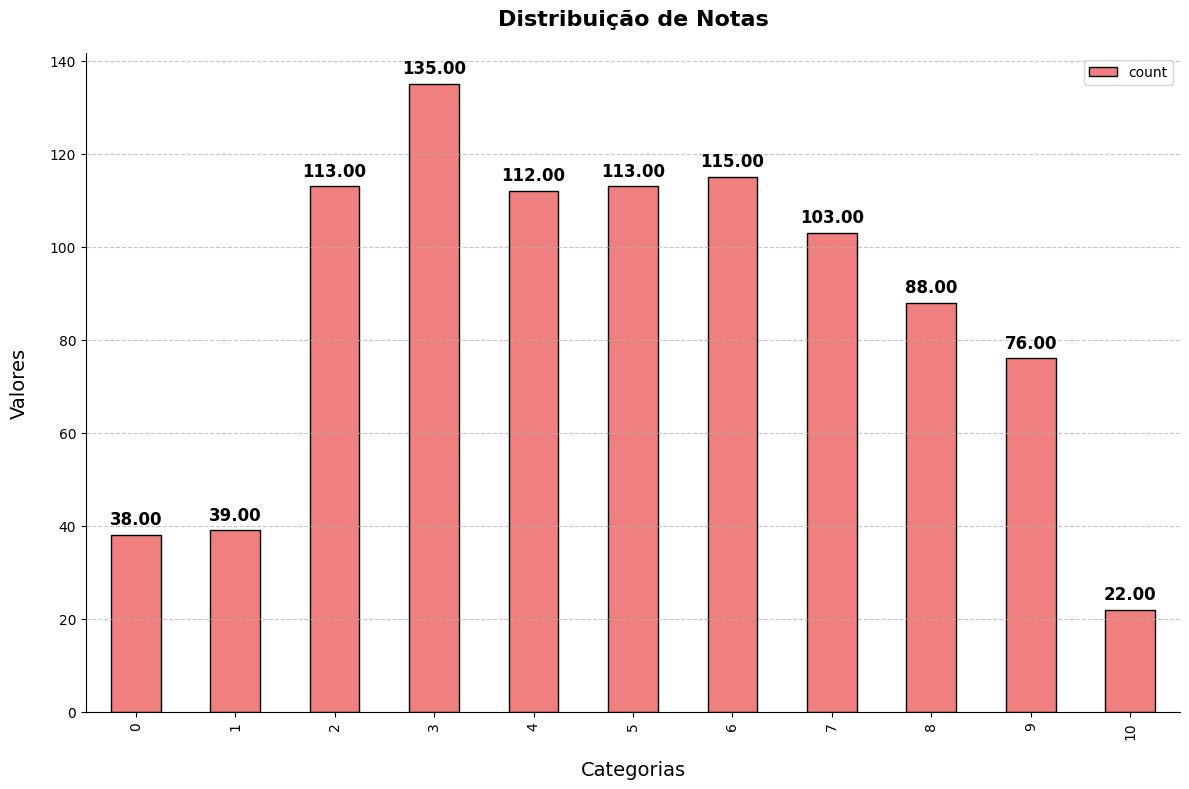

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

bars = notas.plot.bar(legend=True, color='lightcoral', edgecolor='black', ax=ax)

for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                (bar.get_x() + bar.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points', fontsize=12, fontweight='bold')

ax.set_xlabel('Categorias', fontsize=14, labelpad=15)
ax.set_ylabel('Valores', fontsize=14, labelpad=15)
ax.set_title('Distribuição de Notas', fontsize=16, fontweight='bold', pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


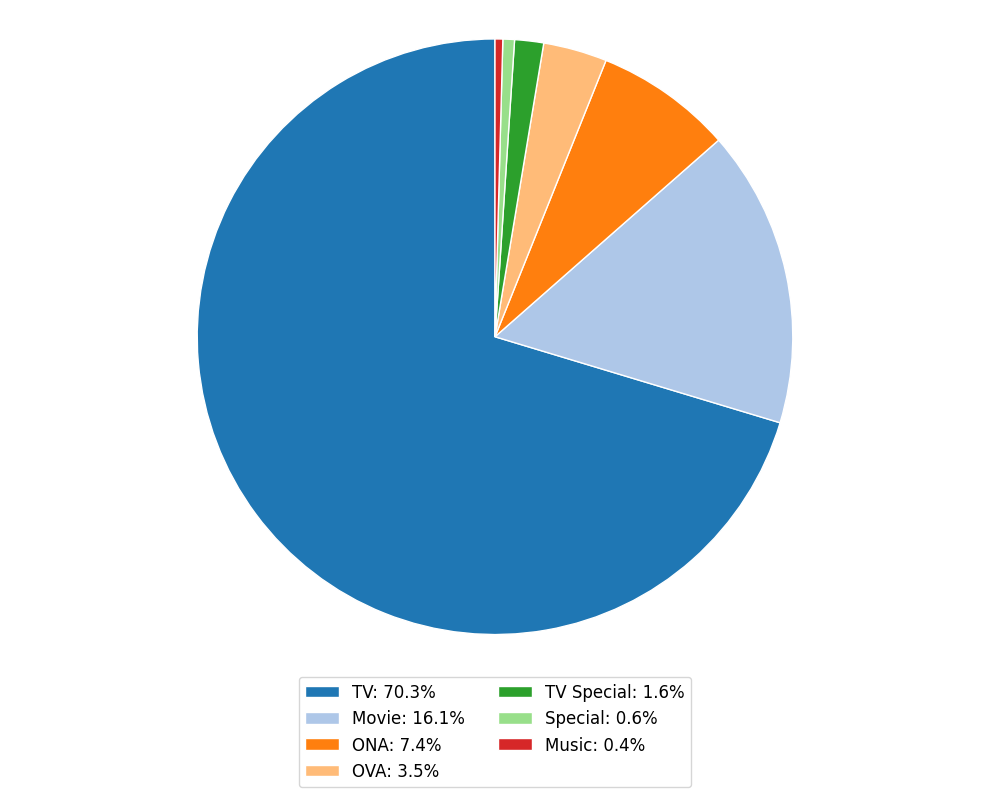

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
tipo = animelist['series_type'].value_counts()

cores = plt.cm.tab20.colors

ax.pie(tipo, labels=None, startangle=90, wedgeprops={'edgecolor': 'white'}, colors=cores[:len(tipo)])

labels = [f'{label}: {pct:.1f}%' for label, pct in zip(tipo.index, 100 * tipo / tipo.sum())]

ax.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=12)

ax.axis('equal')

plt.tight_layout()
plt.show()


In [ ]:
fp2 = (animelist['series_type']).value_counts().sort_index() / animelist['series_type'].count()
print(fp2)

series_type
Movie         0.161426
Music         0.004193
ONA           0.074423
OVA           0.034591
Special       0.006289
TV            0.703354
TV Special    0.015723
Name: count, dtype: float64


In [ ]:
fp = (animelist['my_score']).value_counts().sort_index() / animelist['my_score'].count()
fp.cumsum()

,count
my_score,
0,0.039832
1,0.080713
2,0.199161
3,0.340671
4,0.458071
5,0.576520
6,0.697065
7,0.805031
8,0.897275


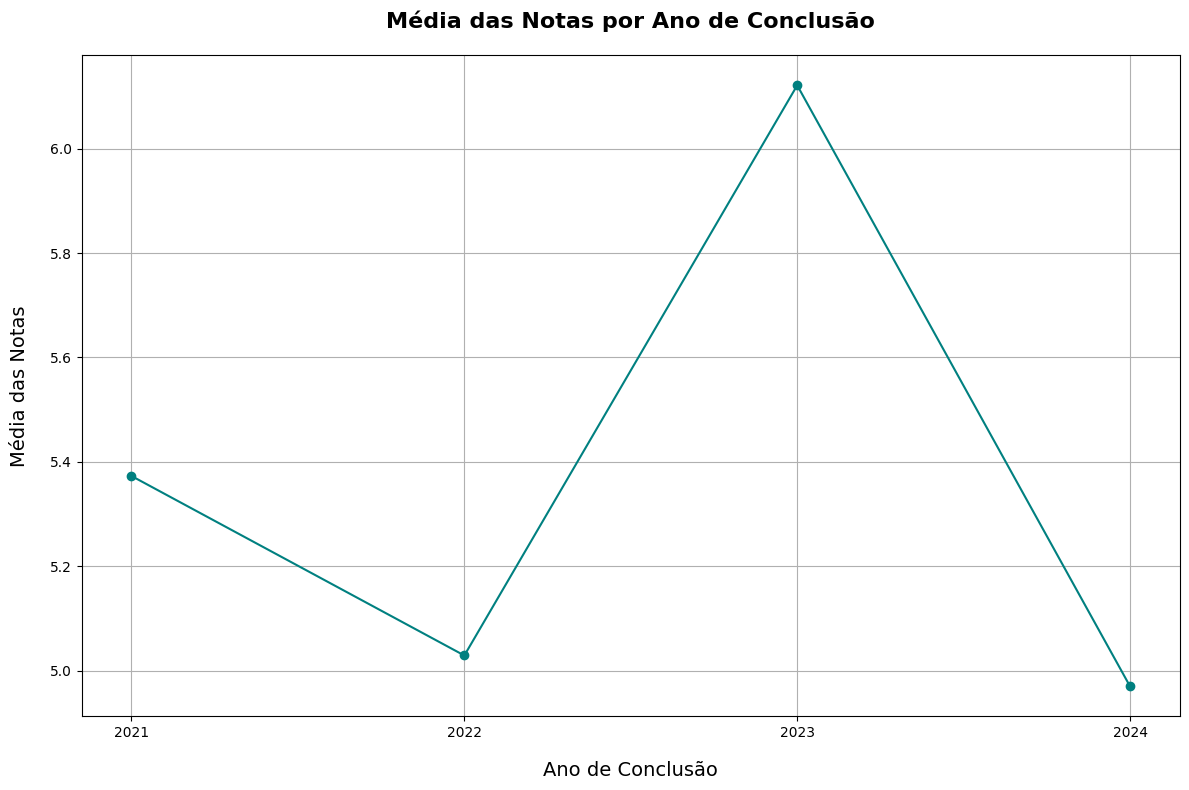

In [ ]:
animelist['my_finish_date'] = pd.to_datetime(animelist['my_finish_date'], format="%Y-%m-%d", errors='coerce')
animelist['year'] = animelist['my_finish_date'].dt.year

filtered_data = animelist[animelist['my_score'] != 0]
year_counts = filtered_data['year'].value_counts()

valid_years = year_counts[year_counts >= 20].index
filtered_data = filtered_data[filtered_data['year'].isin(valid_years)]

scores_year = filtered_data.groupby('year')['my_score'].mean()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(scores_year.index, scores_year, marker='o', linestyle='-', color='teal')

ax.set_title('Média das Notas por Ano de Conclusão', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ano de Conclusão', fontsize=14, labelpad=15)
ax.set_ylabel('Média das Notas', fontsize=14, labelpad=15)
ax.grid(True)
ax.set_xticks(scores_year.index)

plt.tight_layout()
plt.show()

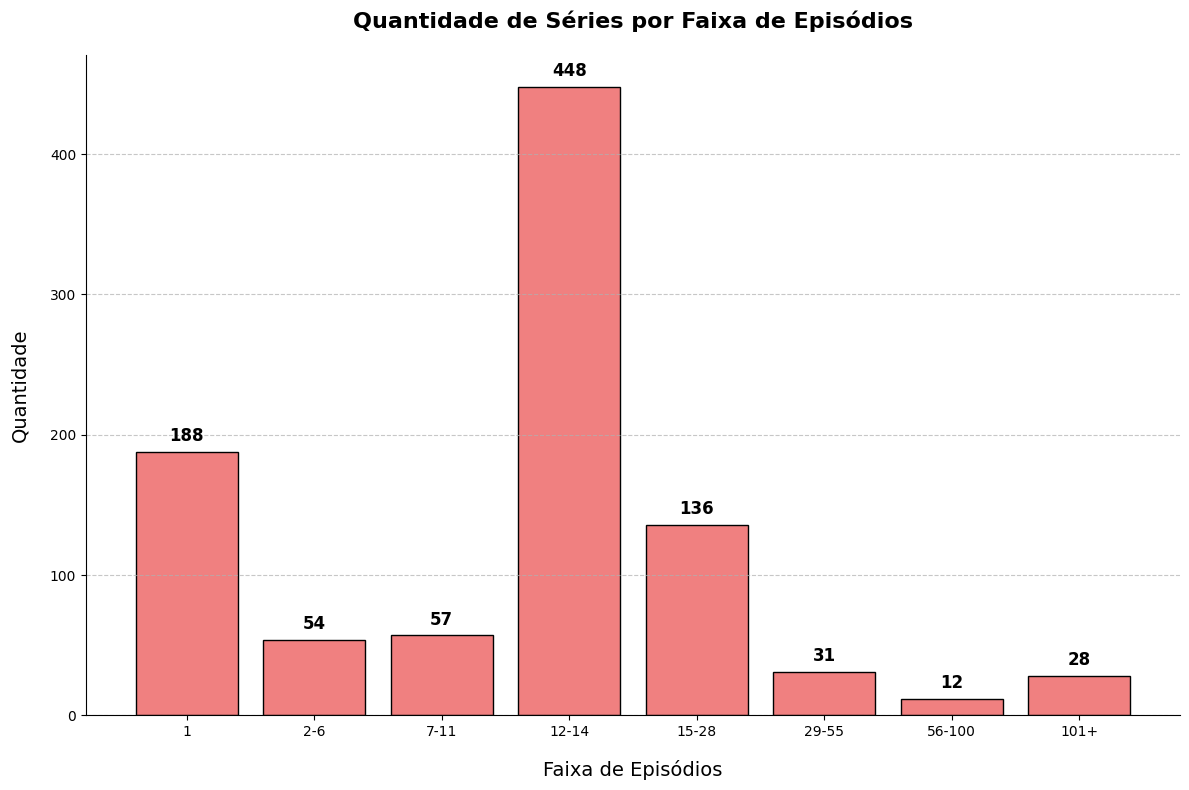

In [ ]:
def categorize_episodes(n):
    if n <= 1:
        return '1'
    elif 2 <= n <= 6:
        return '2-6'
    elif 7 <= n <= 11:
        return '7-11'
    elif 12 <= n <= 14:
        return '12-14'
    elif 15 <= n <= 28:
        return '15-28'
    elif 29 <= n <= 55:
        return '29-55'
    elif 56 <= n <= 100:
        return '56-100'
    else:
        return '101+'

animelist['faixa'] = animelist['series_episodes'].apply(categorize_episodes)

faixa_order = ['1', '2-6', '7-11', '12-14', '15-28', '29-55', '56-100', '101+']
faixas = animelist['faixa'].value_counts()

faixas_df = pd.DataFrame({'Quantidade': faixas})
faixas_df = faixas_df.reindex(faixa_order)
faixas_df = faixas_df.fillna(0)

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(faixas_df.index, faixas_df['Quantidade'], color='lightcoral', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                (bar.get_x() + bar.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points', fontsize=12, fontweight='bold')

ax.set_xlabel('Faixa de Episódios', fontsize=14, labelpad=15)
ax.set_ylabel('Quantidade', fontsize=14, labelpad=15)
ax.set_title('Quantidade de Séries por Faixa de Episódios', fontsize=16, fontweight='bold', pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


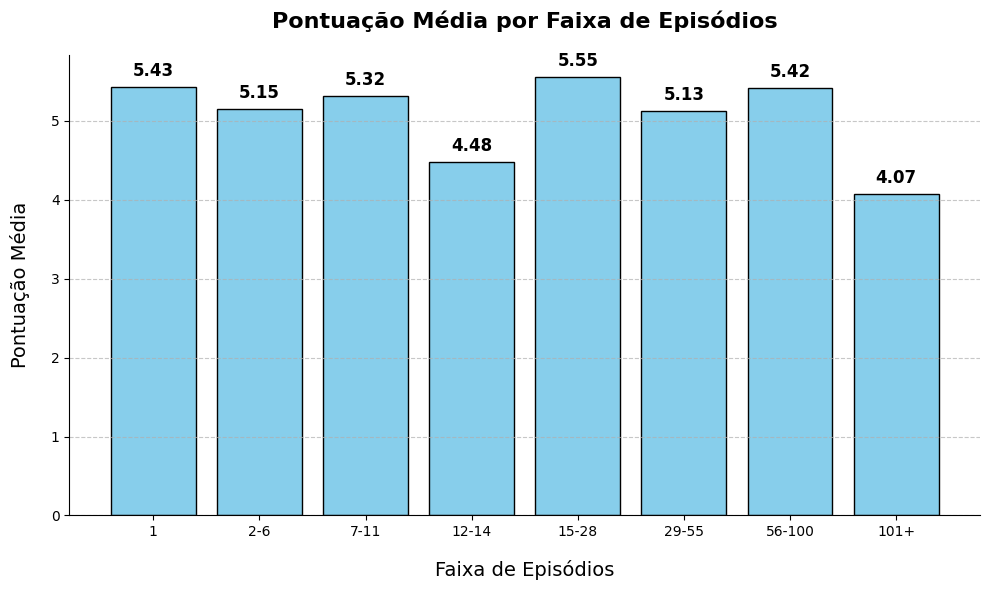

In [ ]:
def categorize_episodes(n):
    if n <= 1:
        return '1'
    elif 2 <= n <= 6:
        return '2-6'
    elif 7 <= n <= 11:
        return '7-11'
    elif 12 <= n <= 14:
        return '12-14'
    elif 15 <= n <= 28:
        return '15-28'
    elif 29 <= n <= 55:
        return '29-55'
    elif 56 <= n <= 100:
        return '56-100'
    else:
        return '101+'

animelist['faixa'] = animelist['series_episodes'].apply(categorize_episodes)

faixa_mean_score = animelist.groupby('faixa')['my_score'].mean()

faixa_order = ['1', '2-6', '7-11', '12-14', '15-28', '29-55', '56-100', '101+']
faixa_mean_score_df = pd.DataFrame({'Mean Score': faixa_mean_score})
faixa_mean_score_df = faixa_mean_score_df.reindex(faixa_order)
faixa_mean_score_df = faixa_mean_score_df.fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(faixa_mean_score_df.index, faixa_mean_score_df['Mean Score'], color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                (bar.get_x() + bar.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points', fontsize=12, fontweight='bold')

ax.set_xlabel('Faixa de Episódios', fontsize=14, labelpad=15)
ax.set_ylabel('Pontuação Média', fontsize=14, labelpad=15)
ax.set_title('Pontuação Média por Faixa de Episódios', fontsize=16, fontweight='bold', pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


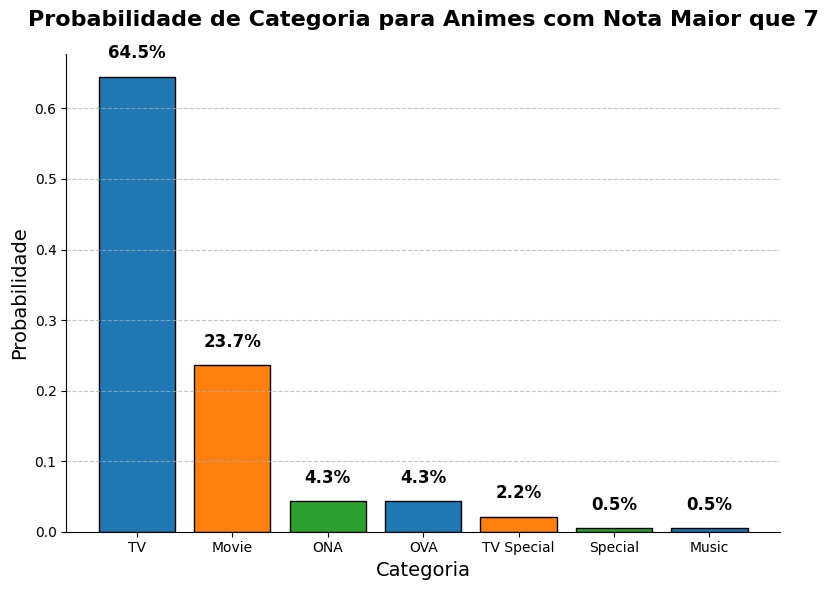

In [ ]:
high_score_animes = animelist[(animelist['my_score'] > 7) & (animelist['my_score'] != 0)]

category_counts = high_score_animes['series_type'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(category_counts.index, category_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.1%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel('Categoria', fontsize=14)
ax.set_ylabel('Probabilidade', fontsize=14)
ax.set_title('Probabilidade de Categoria para Animes com Nota Maior que 7', fontsize=16, fontweight='bold', pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

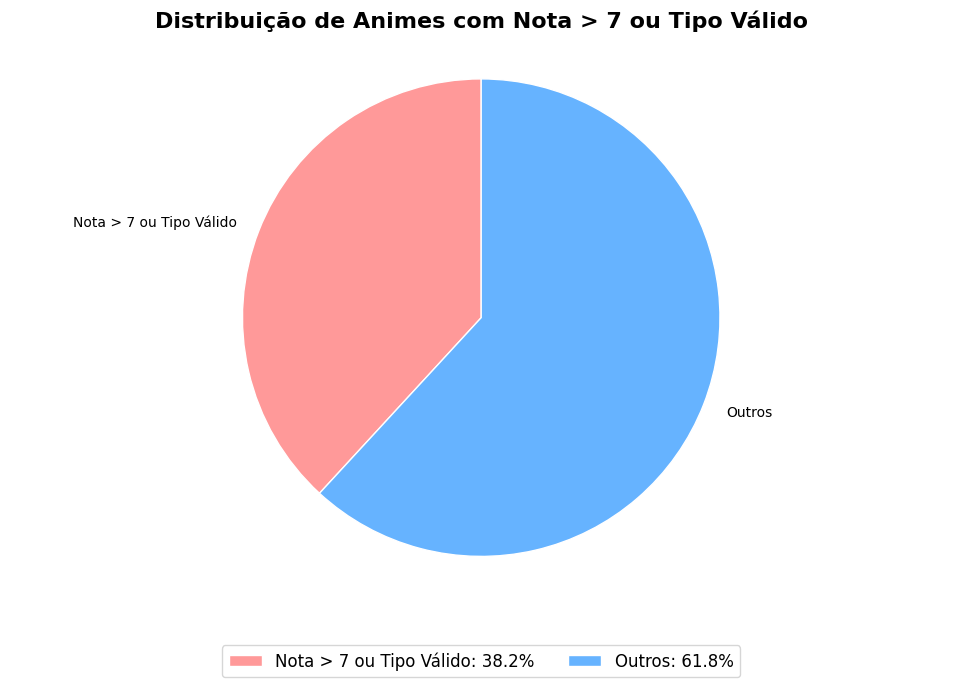

In [ ]:
nota_maior_7 = animelist[animelist['my_score'] > 7]

tipos_validos = ['Special', 'Movie', 'ONA']
tipo_valido = animelist[animelist['series_type'].isin(tipos_validos)]

union = pd.concat([nota_maior_7, tipo_valido]).drop_duplicates()

total_animes = len(animelist)
total_union = len(union)
probabilidade_union = total_union / total_animes

labels = ['Nota > 7 ou Tipo Válido', 'Outros']
sizes = [total_union, total_animes - total_union]
colors = ['#ff9999', '#66b3ff']

fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='', startangle=90, wedgeprops={'edgecolor': 'white'})

labels = [f'{label}: {pct:.1f}%' for label, pct in zip(labels, 100 * pd.Series(sizes) / sum(sizes))]
ax.legend(wedges, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=12)

ax.set_title('Distribuição de Animes com Nota > 7 ou Tipo Válido', fontsize=16, fontweight='bold', pad=20)
ax.axis('equal')

plt.tight_layout()
plt.show()


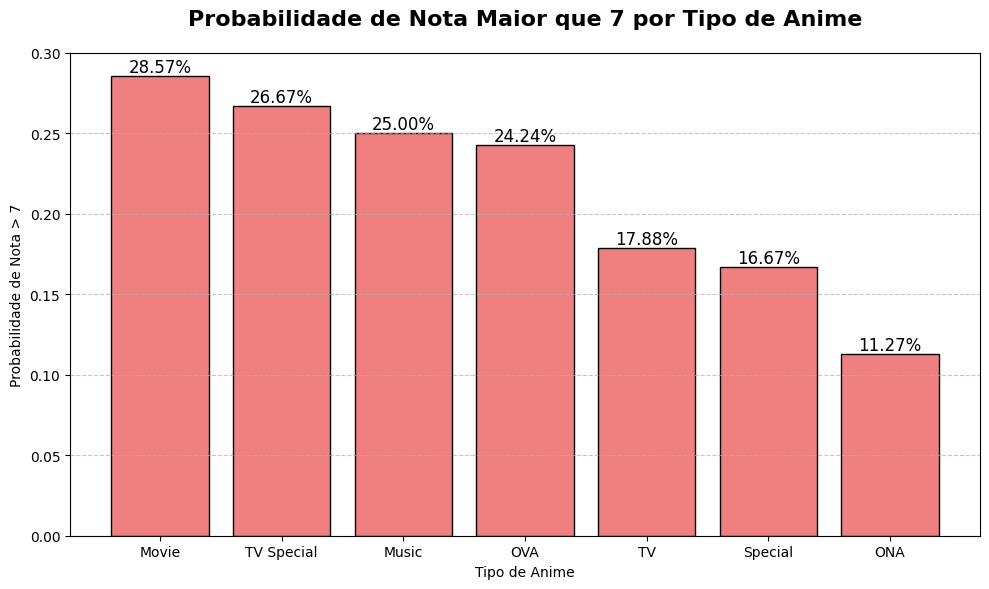

In [ ]:
nota_maior_7 = animelist[animelist['my_score'] > 7]

probabilidades = {}
tipos = animelist['series_type'].unique()

for tipo in tipos:
    total_por_tipo = len(animelist[animelist['series_type'] == tipo])
    total_nota_maior_7_por_tipo = len(nota_maior_7[nota_maior_7['series_type'] == tipo])
    probabilidade = total_nota_maior_7_por_tipo / total_por_tipo if total_por_tipo > 0 else 0
    probabilidades[tipo] = probabilidade

prob_df = pd.DataFrame(list(probabilidades.items()), columns=['Tipo', 'Probabilidade'])
prob_df = prob_df.sort_values(by='Probabilidade', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(prob_df['Tipo'], prob_df['Probabilidade'], color='lightcoral', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2%}',
            ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Tipo de Anime')
ax.set_ylabel('Probabilidade de Nota > 7')
ax.set_title('Probabilidade de Nota Maior que 7 por Tipo de Anime', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


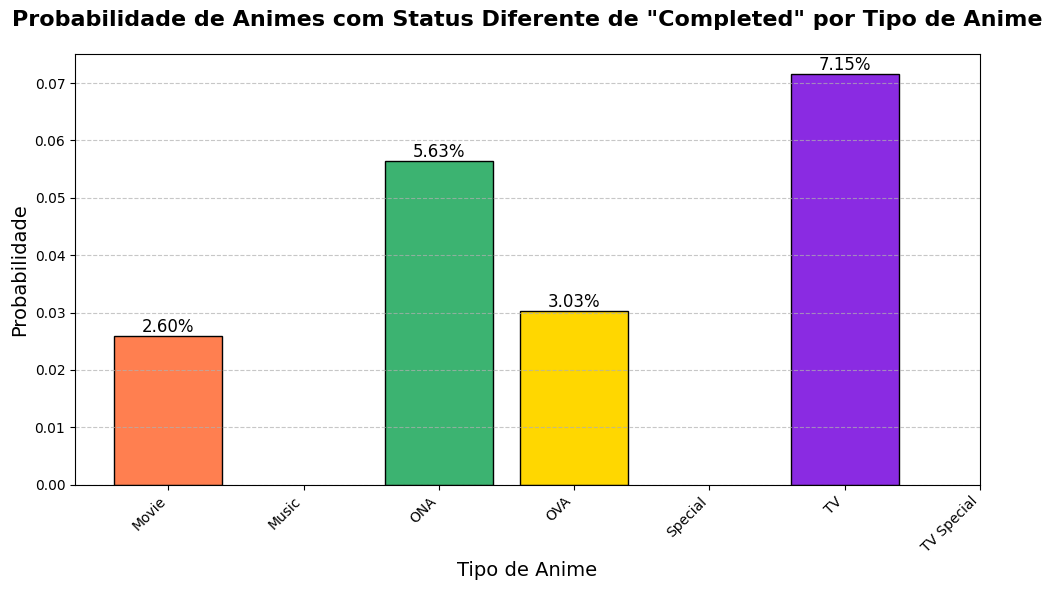

In [ ]:
status_nao_completados = animelist[animelist['my_status'] != 'Completed']

total_por_tipo = animelist['series_type'].value_counts()

nao_completados_por_tipo = status_nao_completados['series_type'].value_counts()

probabilidade_por_tipo = nao_completados_por_tipo / total_por_tipo

colors = ['#FF7F50', '#6495ED', '#3CB371', '#FFD700', '#FF1493', '#8A2BE2', '#00CED1']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(probabilidade_por_tipo.index, probabilidade_por_tipo.values, color=colors[:len(probabilidade_por_tipo)], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    if not pd.isna(height):
        ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom', fontsize=12)

ax.set_title('Probabilidade de Animes com Status Diferente de "Completed" por Tipo de Anime', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Tipo de Anime', fontsize=14)
ax.set_ylabel('Probabilidade', fontsize=14)
ax.set_xticks(range(len(probabilidade_por_tipo.index)))
ax.set_xticklabels(probabilidade_por_tipo.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

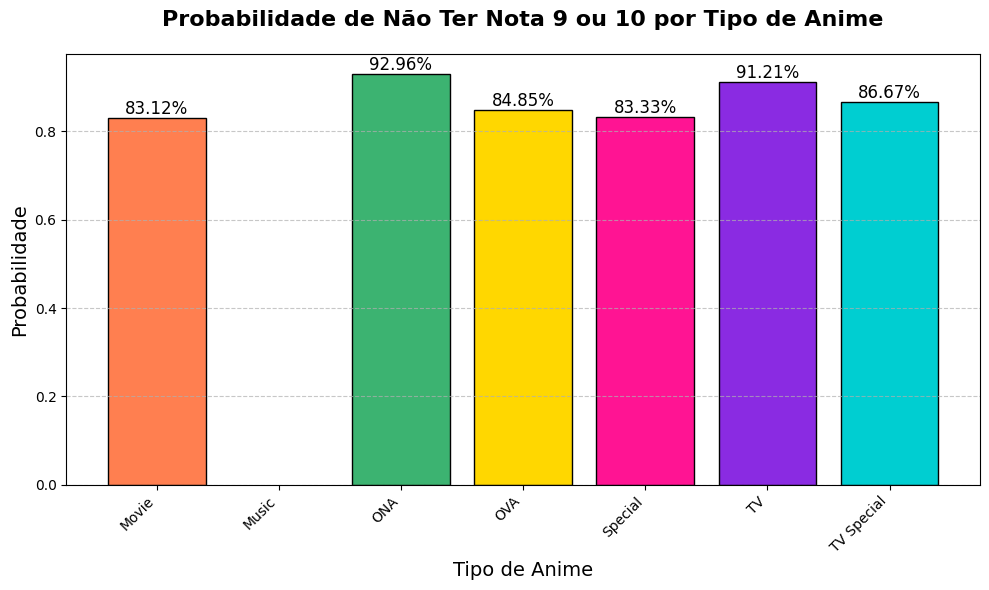

In [ ]:
notas_9_ou_10 = animelist[animelist['my_score'].isin([9, 10])]

total_por_tipo = animelist['series_type'].value_counts()

notas_9_ou_10_por_tipo = notas_9_ou_10['series_type'].value_counts()

nao_nota_9_ou_10_por_tipo = total_por_tipo - notas_9_ou_10_por_tipo

probabilidade_complemento = nao_nota_9_ou_10_por_tipo / total_por_tipo

colors = ['#FF7F50', '#6495ED', '#3CB371', '#FFD700', '#FF1493', '#8A2BE2', '#00CED1']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(probabilidade_complemento.index, probabilidade_complemento.values, color=colors[:len(probabilidade_complemento)], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    if not pd.isna(height):
        ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom', fontsize=12)

ax.set_title('Probabilidade de Não Ter Nota 9 ou 10 por Tipo de Anime', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Tipo de Anime', fontsize=14)
ax.set_ylabel('Probabilidade', fontsize=14)
ax.set_xticks(range(len(probabilidade_complemento.index)))
ax.set_xticklabels(probabilidade_complemento.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

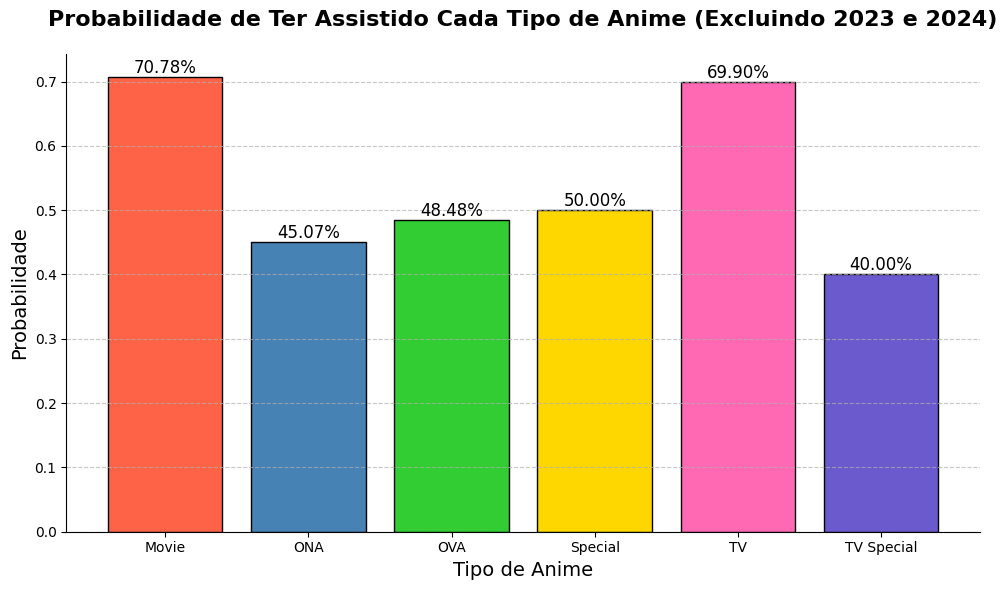

In [ ]:
import numpy as np

filtered_animelist = animelist[~animelist['year'].isin([2023, 2024])]

watched_by_type = filtered_animelist['series_type'].value_counts()
total_by_type = animelist['series_type'].value_counts()

probabilidade_excluindo = watched_by_type / total_by_type

probabilidade_excluindo = probabilidade_excluindo[np.isfinite(probabilidade_excluindo)]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF69B4', '#6A5ACD', '#40E0D0']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(probabilidade_excluindo.index, probabilidade_excluindo.values, color=colors[:len(probabilidade_excluindo)], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Tipo de Anime', fontsize=14)
ax.set_ylabel('Probabilidade', fontsize=14)
ax.set_title('Probabilidade de Ter Assistido Cada Tipo de Anime (Excluindo 2023 e 2024)', fontsize=16, fontweight='bold', pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


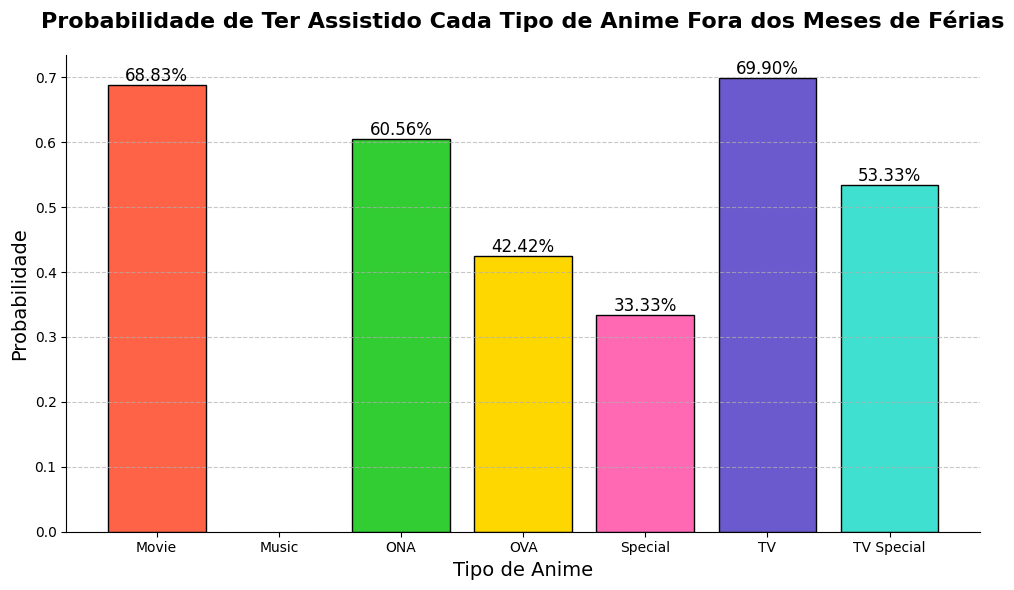

In [ ]:
animelist['month'] = animelist['my_finish_date'].dt.month

meses_de_ferias = [1, 6, 7, 11, 12]

assistidos_fora_ferias = animelist[~animelist['month'].isin(meses_de_ferias)]

total_por_tipo = animelist['series_type'].value_counts()
assistidos_fora_ferias_por_tipo = assistidos_fora_ferias['series_type'].value_counts()

probabilidade_fora_ferias = assistidos_fora_ferias_por_tipo / total_por_tipo

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF69B4', '#6A5ACD', '#40E0D0']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(probabilidade_fora_ferias.index, probabilidade_fora_ferias.values, color=colors[:len(probabilidade_fora_ferias)], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Tipo de Anime', fontsize=14)
ax.set_ylabel('Probabilidade', fontsize=14)
ax.set_title('Probabilidade de Ter Assistido Cada Tipo de Anime Fora dos Meses de Férias', fontsize=16, fontweight='bold', pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

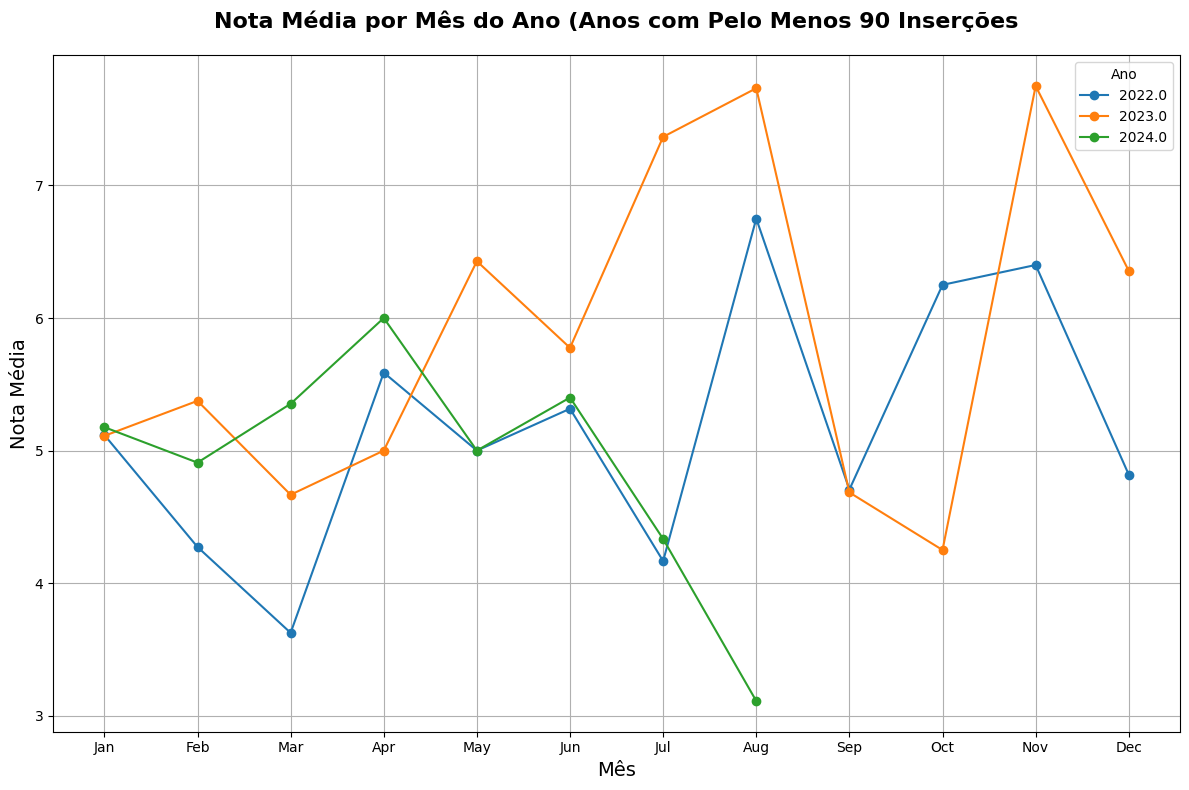

In [ ]:
animelist['month'] = animelist['my_finish_date'].dt.month
animelist['year'] = animelist['my_finish_date'].dt.year

animelist_filtrado = animelist[animelist['my_score'] != 0]

contagem_por_ano = animelist_filtrado['year'].value_counts()

anos_validos = contagem_por_ano[contagem_por_ano >= 90].index

animelist_validos = animelist_filtrado[animelist_filtrado['year'].isin(anos_validos)]

media_por_mes = animelist_validos.groupby(['year', 'month'])['my_score'].mean().reset_index()

media_por_mes_pivot = media_por_mes.pivot(index='month', columns='year', values='my_score')

fig, ax = plt.subplots(figsize=(12, 8))

for year in media_por_mes_pivot.columns:
    ax.plot(media_por_mes_pivot.index, media_por_mes_pivot[year], marker='o', label=year)

ax.set_title('Nota Média por Mês do Ano (Anos com Pelo Menos 90 Inserções)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Nota Média', fontsize=14)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.legend(title='Ano')
ax.grid(True)

plt.tight_layout()
plt.show()